In [1]:
#Importing all the required  libraries
import pandas as pd # Importing pandas for performing EDA
import numpy as np  # Importing numpy for Linear Algebric operations
import matplotlib.pyplot as plt # Importing for Data Visualization
import seaborn as sns # Importing for Data Visualization

  #ML algorithm to be used
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
import xgboost as xgb

#Model evaluation tools
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from pprint import pprint
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report , accuracy_score , confusion_matrix


%matplotlib inline

#Data processing functions

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("TaxiFare.csv")

In [3]:
df.head(10)

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
5,50:45.0,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1
6,35:00.0,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
7,22:00.0,16.5,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1
8,10:00.0,9.0,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.993078,40.731628,1
9,11:00.0,8.9,2009-09-02 01:11:00 UTC,-73.980658,40.733873,-73.991540,40.758138,2


In [4]:
df.shape

(50000, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [6]:
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


# Data Preprocessing

In [7]:
#checking missing values in the data
df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [8]:
#Droping the unique_id column
df.drop(labels='unique_id',axis=1,inplace=True)

In [9]:
df.columns

Index(['amount', 'date_time_of_pickup', 'longitude_of_pickup',
       'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff',
       'no_of_passenger'],
      dtype='object')

In [10]:
# Here pickup_datetime variable is in object so we need to change its data type to datetime
df['date_time_of_pickup'] =  pd.to_datetime(df['date_time_of_pickup'], format='%Y-%m-%d %H:%M:%S UTC')

In [11]:
### Seperating the Pickup_datetime column into separate field like year, month, day of the week, etc
df['year'] = df['date_time_of_pickup'].dt.year
df['Month'] = df['date_time_of_pickup'].dt.month
df['Date'] = df['date_time_of_pickup'].dt.day
df['Day'] = df['date_time_of_pickup'].dt.dayofweek
df['Hour'] = df['date_time_of_pickup'].dt.hour
df['Minute'] = df['date_time_of_pickup'].dt.minute
     

In [12]:
df.dtypes

amount                         float64
date_time_of_pickup     datetime64[ns]
longitude_of_pickup            float64
latitude_of_pickup             float64
longitude_of_dropoff           float64
latitude_of_dropoff            float64
no_of_passenger                  int64
year                             int64
Month                            int64
Date                             int64
Day                              int64
Hour                             int64
Minute                           int64
dtype: object

In [13]:
#Checking the passenger count variable
df["no_of_passenger"].describe()

count    50000.000000
mean         1.667840
std          1.289195
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: no_of_passenger, dtype: float64

In [14]:
# removing the values with passenger count of 0.
df = df.drop(df[df["no_of_passenger"] == 0 ].index, axis=0)

In [15]:
df["no_of_passenger"].describe()

count    49835.000000
mean         1.673362
std          1.287744
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: no_of_passenger, dtype: float64

In [16]:
##finding decending order of fare to get to know whether the outliers are present or not
df["amount"].sort_values(ascending=False)

28373    200.0
1335     180.0
43956    165.0
1483     165.0
46198    160.0
         ...  
36722     -2.5
28839     -2.5
2039      -2.9
13032     -3.0
42337     -5.0
Name: amount, Length: 49835, dtype: float64

In [17]:
#Removing outliers
df = df.drop(df[df["amount"]<0].index, axis=0)
df.shape

(49829, 13)

In [18]:
#Also remove the row where fare amount is zero
df = df.drop(df[df["amount"]<1].index, axis=0)
df.shape

(49825, 13)

In [19]:
#checking again
df["amount"].sort_values(ascending=False)

28373    200.0
1335     180.0
1483     165.0
43956    165.0
46198    160.0
         ...  
34445      2.5
28444      2.5
8711       2.5
49292      2.5
17862      2.5
Name: amount, Length: 49825, dtype: float64

In [20]:
##make sure there is no negative values in the fare_amount variable column
df["amount"].min()

2.5

In [21]:
#Lattitude----(-90 to 90)
#Longitude----(-180 to 180)

# we need to drop the rows having  pickup lattitute and longitute out the range mentioned above
df = df.drop((df[df['latitude_of_pickup']<-90]).index, axis=0)
df = df.drop((df[df['latitude_of_pickup']>90]).index, axis=0)

In [22]:
df[df['longitude_of_pickup']<-180]
df[df['longitude_of_pickup']>180]

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,year,Month,Date,Day,Hour,Minute


In [23]:
df[df['latitude_of_dropoff']<-90]
df[df['latitude_of_dropoff']>90]

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,year,Month,Date,Day,Hour,Minute


In [24]:
df[df['longitude_of_dropoff']<-180]
df[df['longitude_of_dropoff']>180]

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,year,Month,Date,Day,Hour,Minute


In [25]:
df.shape

(49824, 13)

In [26]:
#As we know that we have given pickup longitute and latitude values and same for drop.
#So we need to calculate the distance Using the haversine formula and we will create a new variable called distance
from math import radians, cos, sin, asin, sqrt

def haversine(a):
    lon1=a[0]
    lat1=a[1]
    lon2=a[2]
    lat2=a[3]
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c =  2 * asin(sqrt(a))
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

In [27]:
df['distance'] = df[['longitude_of_pickup','latitude_of_pickup','longitude_of_dropoff','latitude_of_dropoff']].apply(haversine,axis=1)

In [28]:
df.head()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,year,Month,Date,Day,Hour,Minute,distance
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,0,17,26,1.030764
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,1,16,52,8.450134
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,3,0,35,1.389525
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,5,4,30,2.799270
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,1,7,51,1.999157


In [29]:
df.nunique()

amount                    697
date_time_of_pickup     49380
longitude_of_pickup     33652
latitude_of_pickup      36515
longitude_of_dropoff    34808
latitude_of_dropoff     37336
no_of_passenger             6
year                        7
Month                      12
Date                       31
Day                         7
Hour                       24
Minute                     60
distance                48379
dtype: int64

In [30]:
##finding decending order of fare to get to know whether the outliers are presented or not
print(df['distance'].sort_values(ascending=False))

48996    8667.818812
31823    8667.572331
9147     8667.542104
37798    8667.534293
8647     8667.497512
            ...     
16945       0.000000
45983       0.000000
45985       0.000000
16926       0.000000
49999       0.000000
Name: distance, Length: 49824, dtype: float64


<AxesSubplot:xlabel='distance'>

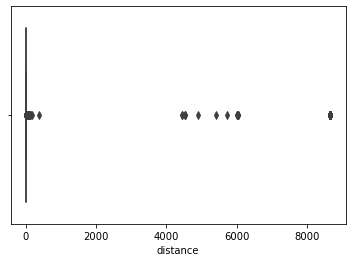

In [31]:
sns.boxplot(x='distance',data=df)

In [32]:
# we will remove the rows whose distance value is zero

df = df.drop(df[df['distance']== 0].index, axis=0)
df.shape

(48378, 14)

In [33]:
#we will remove the rows whose distance values is very high which is more than 129kms
df = df.drop(df[df['distance'] > 130 ].index, axis=0)
df.shape

(48288, 14)

<AxesSubplot:xlabel='distance'>

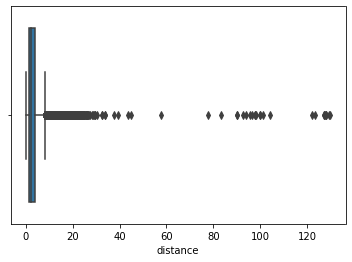

In [34]:
sns.boxplot(x='distance',data=df)

In [35]:
df.head()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,year,Month,Date,Day,Hour,Minute,distance
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,0,17,26,1.030764
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,1,16,52,8.450134
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,3,0,35,1.389525
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,5,4,30,2.799270
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,1,7,51,1.999157


In [36]:
drop = ['date_time_of_pickup', 'longitude_of_pickup', 'latitude_of_pickup','longitude_of_dropoff', 'latitude_of_dropoff', 'Minute']
df = df.drop(drop, axis = 1)

In [37]:
df.head()

,amount,no_of_passenger,year,Month,Date,Day,Hour,distance
0,4.5,1,2009,6,15,0,17,1.030764
1,16.9,1,2010,1,5,1,16,8.450134
2,5.7,2,2011,8,18,3,0,1.389525
3,7.7,1,2012,4,21,5,4,2.799270
4,5.3,1,2010,3,9,1,7,1.999157


In [38]:
df.dtypes

amount             float64
no_of_passenger      int64
year                 int64
Month                int64
Date                 int64
Day                  int64
Hour                 int64
distance           float64
dtype: object

# Exploratory Data Analysis

Text(0, 0.5, 'Count')

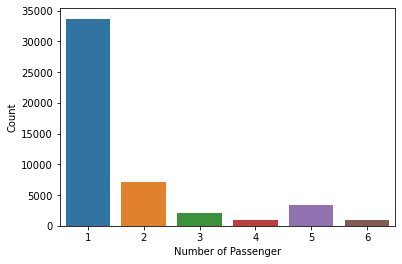

In [39]:
# Count plot on passenger count
plt.figure(figsize=(6,4))
sns.countplot(x="no_of_passenger", data=df)
plt.xlabel("Number of Passenger")
plt.ylabel("Count")

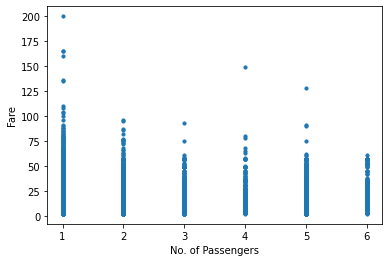

In [40]:
#Relationship beetween number of passengers and Fare
plt.figure(figsize=(6,4))
plt.scatter(x=df['no_of_passenger'], y=df['amount'], s=10)
plt.xlabel('No. of Passengers')
plt.ylabel('Fare')
plt.show()

Insights from data:

Single travelling passengers are most frequent travellers.
At the sametime we can also conclude that highest Fare are coming from single & double travelling passengers

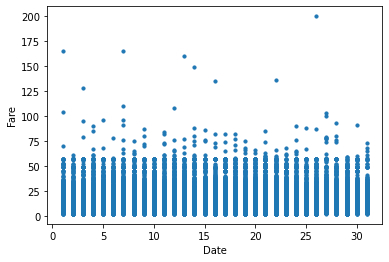

In [41]:
#Relationship between date and Fare
plt.figure(figsize=(6,4))
plt.scatter(x=df['Date'], y=df['amount'], s=10)
plt.xlabel('Date')
plt.ylabel('Fare')
plt.show()

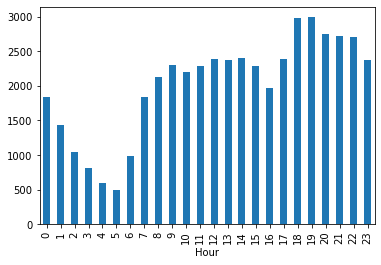

In [42]:
#Relationship between date and Fare
plt.figure(figsize=(6,4))
df.groupby(df["Hour"])['Hour'].count().plot(kind="bar")
plt.show()

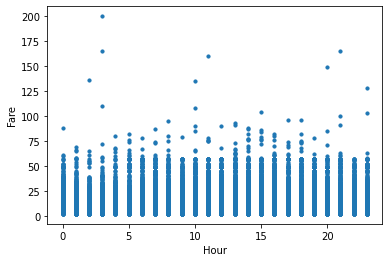

In [43]:
#Relationship between Time and Fare
plt.figure(figsize=(6,4))
plt.scatter(x=df['Hour'], y=df['amount'], s=10)
plt.xlabel('Hour')
plt.ylabel('Fare')
plt.show()

Data Insights:

From the above plot We can observe that the cabs taken at 7 am and 23 Pm are the costliest.
Hence we can assume that cabs taken early in morning and late at night are costliest

Text(0, 0.5, 'Count')

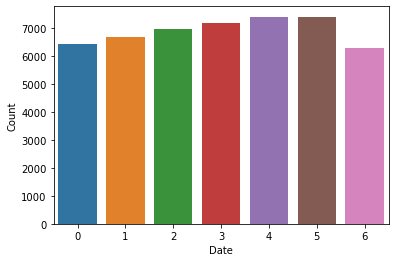

In [44]:
#impact of Day on the number of cab rides
plt.figure(figsize=(6,4))
sns.countplot(x="Day", data=df)
plt.xlabel('Date')
plt.ylabel('Count')

Data Insights: The day of the week does not seem to have much influence on the number of cabs ride.

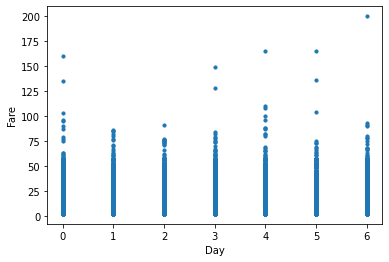

In [45]:
#Relationships between day and Fare
plt.figure(figsize=(6,4))
plt.scatter(x=df['Day'], y=df['amount'], s=10)
plt.xlabel('Day')
plt.ylabel('Fare')
plt.show()

Data Insight:

The highest fares seem to be on a Sunday, Monday and Thursday, and the low on Wednesday and Saturday.

May be due to low demand of the cabs on saturdays the cab fare is low and high demand of cabs on sunday and monday shows the high fare prices

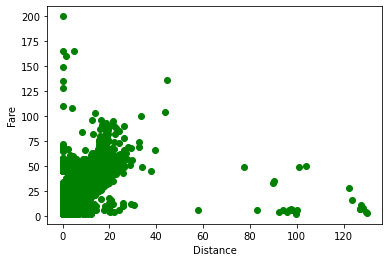

In [46]:
#Relationship between distance and fare
plt.figure(figsize=(6,4))
plt.scatter(x = df['distance'],y = df['amount'],c = "g")
plt.xlabel('Distance')
plt.ylabel('Fare')
plt.show()

Data Insight:

It is quite obvious that distance will effect the amount of fare.

# Feature Scaling

amount


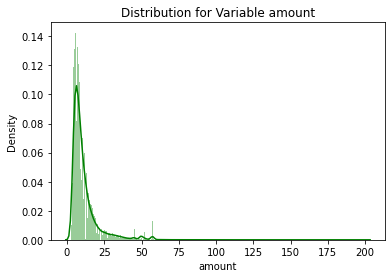

distance


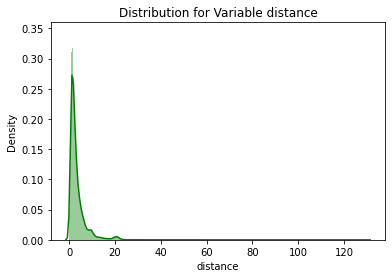

In [47]:
#Normality check of dataing data is uniformly distributed or not-
for i in ['amount', 'distance']:
    print(i)
    sns.distplot(df[i],bins='auto',color='green')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

In [48]:
#since skewness of target variable is high, apply log transform to reduce the skewness-
df['amount'] = np.log1p(df['amount'])

#since skewness of distance variable is high, apply log transform to reduce the skewness-
df['distance'] = np.log1p(df['distance'])

amount


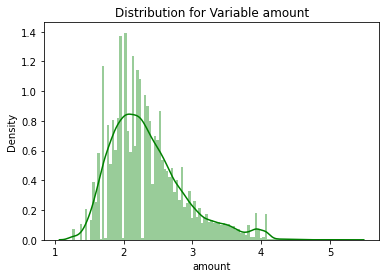

distance


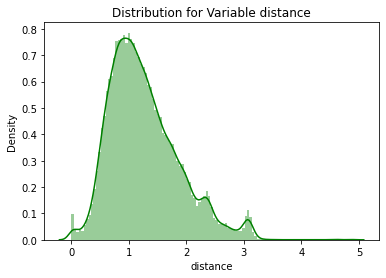

In [49]:
#Normality Re-check to check data is uniformly distributed or not after log transformartion
for i in ['amount', 'distance']:
    print(i)
    sns.distplot(df[i],bins='auto',color='green')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

Data Insight:

Here we can see bell shaped distribution. Hence our continous variables are now normally distributed, we will use not use any Feature Scalling technique. i.e, Normalization or Standarization for our training data

# Model Building

In [50]:
x= df.drop('amount',axis=1)
y=df['amount']

In [51]:
#Data test split for further modelling
X_train, X_test, y_train, y_test = train_test_split( x,y, test_size = 0.20, random_state = 1)

In [52]:
print(X_train.shape)
print(X_test.shape)

(38630, 7)
(9658, 7)


## Linear Regression

In [53]:
# Building model on top of training dataset

fit_LR = LinearRegression().fit(X_train , y_train)

#prediction on train data
pred_train_LR = fit_LR.predict(X_train)

#prediction on test data
pred_test_LR = fit_LR.predict(X_test)

##calculating RMSE for test data
RMSE_test_LR = np.sqrt(mean_squared_error(y_test, pred_test_LR))

##calculating RMSE for train data
RMSE_train_LR= np.sqrt(mean_squared_error(y_train, pred_train_LR))

In [54]:
print("Root Mean Squared Error For trainaing data = "+ str(RMSE_train_LR))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_LR))

Root Mean Squared Error For trainaing data = 0.26531008011326324
Root Mean Squared Error For Test data = 0.2635088894727664


In [55]:
#calculate R^2 for train data
from sklearn.metrics import r2_score
r2_score(y_train, pred_train_LR)

0.7624281883075777

In [56]:
r2_score(y_test, pred_test_LR)

0.7659349212514767

## Decision Tree

In [57]:
fit_DT = DecisionTreeRegressor(max_depth = 2).fit(X_train,y_train)

#prediction on data data
pred_train_DT = fit_DT.predict(X_train)

#prediction on test data
pred_test_DT = fit_DT.predict(X_test)

##calculating RMSE for train data
RMSE_train_DT = np.sqrt(mean_squared_error(y_train, pred_train_DT))

##calculating RMSE for test data
RMSE_test_DT = np.sqrt(mean_squared_error(y_test, pred_test_DT))

In [58]:
print("Root Mean Squared Error For trainaing data = "+ str(RMSE_train_LR))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_LR))

Root Mean Squared Error For trainaing data = 0.26531008011326324
Root Mean Squared Error For Test data = 0.2635088894727664


In [59]:
## R^2 calculation for train data
r2_score(y_train, pred_train_DT)

0.705232625941542

In [60]:
## R^2 calculation for test data
r2_score(y_test, pred_test_DT)

0.7107983389263752

## Random Forest Model

In [61]:
fit_RF = RandomForestRegressor(n_estimators = 200).fit(X_train,y_train)

#prediction on train data
pred_train_RF = fit_RF.predict(X_train)
#prediction on test data
pred_test_RF = fit_RF.predict(X_test)

##calculating RMSE for train data
RMSE_train_RF = np.sqrt(mean_squared_error(y_train, pred_train_RF))
##calculating RMSE for test data
RMSE_test_RF = np.sqrt(mean_squared_error(y_test, pred_test_RF))

In [62]:
print("Root Mean Squared Error For training data = "+str(RMSE_train_RF))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_RF))

Root Mean Squared Error For training data = 0.09066760481285971
Root Mean Squared Error For Test data = 0.23865307918247136


In [63]:
## calculate R^2 for train data
r2_score(y_train, pred_train_RF)

0.972254555038188

In [64]:
#calculate R^2 for test data
r2_score(y_test, pred_test_RF)

0.8080093110803583

## Gradient Boosting

In [65]:
fit_GB = GradientBoostingRegressor().fit(X_train, y_train)

#prediction on train data
pred_train_GB = fit_GB.predict(X_train)

#prediction on test data
pred_test_GB = fit_GB.predict(X_test)

##calculating RMSE for train data
RMSE_train_GB = np.sqrt(mean_squared_error(y_train, pred_train_GB))
##calculating RMSE for test data
RMSE_test_GB = np.sqrt(mean_squared_error(y_test, pred_test_GB))
     


In [66]:
print("Root Mean Squared Error For training data = "+str(RMSE_train_GB))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_GB))

Root Mean Squared Error For training data = 0.22721239333540277
Root Mean Squared Error For Test data = 0.22710723602363372


In [67]:
#calculate R^2 for test data
r2_score(y_test, pred_test_GB)

0.8261366568324462

In [68]:
#calculate R^2 for train data
r2_score(y_train, pred_train_GB)

0.8257585643531753

In [69]:
print("Root Mean Squared Error For Test data for Linerar Regression = " +str(RMSE_test_LR))

print("Root Mean Squared Error For Test data for Decision Tree = "+str(RMSE_test_DT))

print("Root Mean Squared Error For Test data for Random Forest = "+str(RMSE_test_RF))

print("Root Mean Squared Error For Test data Gradient Boosting = "+str(RMSE_test_GB))

Root Mean Squared Error For Test data for Linerar Regression = 0.2635088894727664
Root Mean Squared Error For Test data for Decision Tree = 0.29290538097218677
Root Mean Squared Error For Test data for Random Forest = 0.23865307918247136
Root Mean Squared Error For Test data Gradient Boosting = 0.22710723602363372


# Hyperparameter Tuning

In [70]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [71]:
##Random Hyperparameter Grid
from sklearn.model_selection import train_test_split,RandomizedSearchCV

##Random Search CV on Random Forest Model
RRF = RandomForestRegressor(random_state = 0)
n_estimator = list(range(1,200,2))
depth = list(range(1,100,2))
# Create the random grid
rand_grid = {'n_estimators': n_estimator,
               'max_depth': depth}

randomcv_rf = RandomizedSearchCV(RRF, param_distributions = rand_grid, n_iter = 5, cv = 5, random_state=0)
randomcv_rf = randomcv_rf.fit(X_train,y_train)
predictions_RRF = randomcv_rf.predict(X_test)

view_best_params_RRF = randomcv_rf.best_params_

best_model = randomcv_rf.best_estimator_

predictions_RRF = best_model.predict(X_test)

#R^2
RRF_r2 = r2_score(y_test, predictions_RRF)
#Calculating RMSE
RRF_rmse = np.sqrt(mean_squared_error(y_test,predictions_RRF))

print('Random Search CV Random Forest Regressor Model Performance:')
print('Best Parameters = ',view_best_params_RRF)
print('R-squared = {:0.2}.'.format(RRF_r2))
print('RMSE = ',RRF_rmse)

Random Search CV Random Forest Regressor Model Performance:
Best Parameters =  {'n_estimators': 129, 'max_depth': 65}
R-squared = 0.81.
RMSE =  0.2389981958445601


In [72]:
## Grid Search CV for gradient boosting
gb = GradientBoostingRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

# Create the grid
grid_search = {'n_estimators': n_estimator,
               'max_depth': depth}

## Grid Search Cross-Validation with 5 fold CV
gridcv_gb = GridSearchCV(gb, param_grid = grid_search, cv = 5)
gridcv_gb = gridcv_gb.fit(X_train,y_train)
view_best_params_Ggb = gridcv_gb.best_params_

#Apply model on test data
predictions_Ggb = gridcv_gb.predict(X_test)

#R^2
Ggb_r2 = r2_score(y_test, predictions_Ggb)
#Calculating RMSE
Ggb_rmse = np.sqrt(mean_squared_error(y_test,predictions_Ggb))

print('Grid Search CV Gradient Boosting regression Model Performance:')
print('Best Parameters = ',view_best_params_Ggb)
print('R-squared = {:0.2}.'.format(Ggb_r2))
print('RMSE = ',(Ggb_rmse))

Grid Search CV Gradient Boosting regression Model Performance:
Best Parameters =  {'max_depth': 7, 'n_estimators': 19}
R-squared = 0.8.
RMSE =  0.2424098788815678


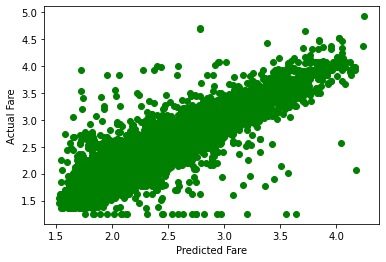

In [73]:
plt.figure(figsize=(6,4))
plt.scatter(x = pred_test_RF,y = y_test,c = "g")
plt.xlabel('Predicted Fare')
plt.ylabel('Actual Fare')
plt.show()

In [74]:
# for best parameters GradientBoostingRegressor
fit_GB = GradientBoostingRegressor(max_depth=7,n_estimators=19).fit(X_train, y_train)

#prediction on data data
pred_train_GB = fit_GB.predict(X_train)

#prediction on test data
pred_test_GB = fit_GB.predict(X_test)

##calculating RMSE for train data
RMSE_train_GB = np.sqrt(mean_squared_error(y_train, pred_train_GB))
##calculating RMSE for test data
RMSE_test_GB = np.sqrt(mean_squared_error(y_test, pred_test_GB))

print("Root Mean Squared Error For training data = "+str(RMSE_train_GB))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_GB))

## calculate R^2 for train data
print(r2_score(y_train, pred_train_GB),'r2 score train data')
#calculate R^2 for test data
print(r2_score(y_test, pred_test_GB),'r2 score for test data')

Root Mean Squared Error For training data = 0.23280452744583324
Root Mean Squared Error For Test data = 0.2422966514230799
0.8170761842896043 r2 score train data
0.8021022269922636 r2 score for test data


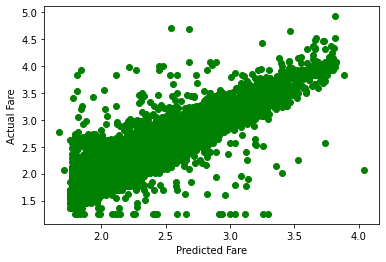

In [75]:
plt.figure(figsize=(6,4))
plt.scatter(x = pred_test_GB,y = y_test,c = "g")
plt.xlabel('Predicted Fare')
plt.ylabel('Actual Fare')
plt.show()

By comparing above two models we can say that Random Forest is the best fit model for predicting taxi fare